中文字体启用： Noto Sans SC


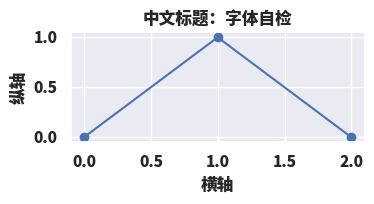

In [3]:
# 离线中文字体配置（使用 NotoSansSC-Black.ttf）
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
import seaborn as sns
from pathlib import Path

# 用你现有的字体文件
FONT_FILE = Path("NotoSansSC-Black.ttf")

if not FONT_FILE.exists():
    raise FileNotFoundError(f"请把 {FONT_FILE} 放到当前目录")

# 注册并获取字体名称
fm.fontManager.addfont(str(FONT_FILE.resolve()))
FONT_NAME = fm.FontProperties(fname=str(FONT_FILE.resolve())).get_name()

# 全局启用
rcParams["font.family"] = [FONT_NAME]
rcParams["axes.unicode_minus"] = False
sns.set_theme(font=FONT_NAME, rc={"axes.unicode_minus": False})

print("中文字体启用：", FONT_NAME)

# 验证
plt.figure(figsize=(4,2.2))
plt.title("中文标题：字体自检")
plt.xlabel("横轴")
plt.ylabel("纵轴")
plt.plot([0,1,2],[0,1,0],"o-"); plt.tight_layout(); plt.show()


估计截距 (beta_0): 12.09
估计斜率 (beta_1): 0.20
2500平方英尺房屋预测价格：503.00 万元


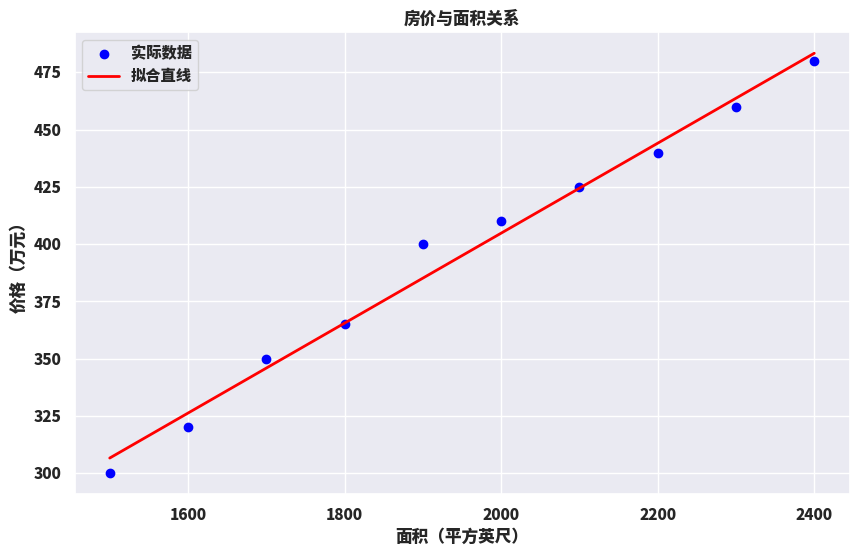

In [5]:
# --- Example 1 ---
# 导入必要库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 创建数据（面积，价格）
sizes = np.array([1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400]).reshape(-1, 1)
prices = np.array([300, 320, 350, 365, 400, 410, 425, 440, 460, 480])

# 创建线性回归模型对象
model = LinearRegression()

# 训练模型
model.fit(sizes, prices)

# 获取估计系数
intercept = model.intercept_
slope = model.coef_
print(f"估计截距 (beta_0): {intercept:.2f}")
print(f"估计斜率 (beta_1): {slope[0]:.2f}")

# 预测2500平方英尺房屋价格
predicted_price_2500 = model.predict(np.array([[2500]]))
print(f"2500平方英尺房屋预测价格：{predicted_price_2500[0]:.2f} 万元")

# 可视化结果
plt.figure(figsize=(10, 6))
plt.scatter(sizes, prices, color='blue', label='实际数据')
plt.plot(sizes, model.predict(sizes), color='red', linewidth=2, label='拟合直线')
plt.title('房价与面积关系')
plt.xlabel('面积（平方英尺）')
plt.ylabel('价格（万元）')
plt.legend()
plt.grid(True)
plt.show()


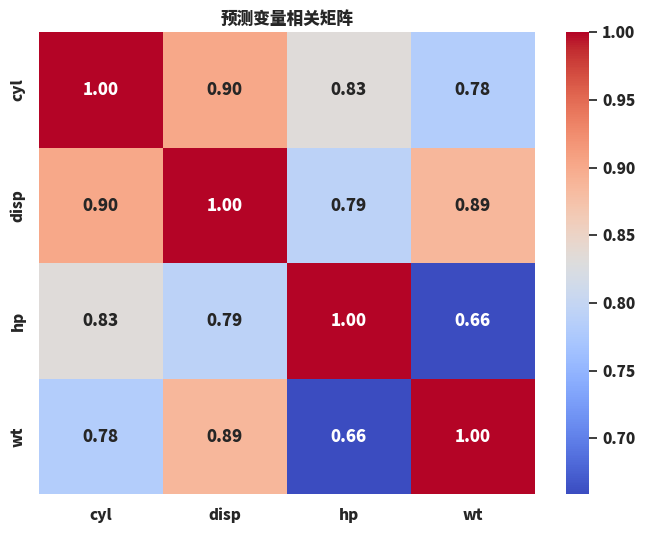

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     54.53
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           2.98e-09
Time:                        22:16:26   Log-Likelihood:                -57.178
No. Observations:                  25   AIC:                             120.4
Df Residuals:                      22   BIC:                             124.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.7764      1.746     21.068      0.0

In [6]:
# --- Example 2 ---
# 导入库
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 载入数据集
# 'mtcars'包含32辆汽车信息，预测目标为'mpg'（每加仑英里数）
df = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df.head()

# --- 特征选择与多重共线性检查 ---
features = ['cyl', 'disp', 'hp', 'wt']  # 潜在有用特征
target = 'mpg'

# 画相关矩阵热图
plt.figure(figsize=(8, 6))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('预测变量相关矩阵')
plt.show()

# 相关矩阵显示'disp'（排量）与'cyl'（气缸数）、'hp'（马力）高度相关，存在共线性

# 为简化模型，去除'disp'和'cyl'
X = df[['hp', 'wt']]  # 马力和重量
y = df['mpg']

# 添加截距项
X = sm.add_constant(X)

# 划分训练/测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用statsmodels拟合模型，获得详尽统计信息
model_sm = sm.OLS(y_train, X_train).fit()
print(model_sm.summary())

# --- 使用scikit-learn预测与评估 ---
model_sk = LinearRegression()
model_sk.fit(X_train.drop('const', axis=1), y_train)

y_pred = model_sk.predict(X_test.drop('const', axis=1))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\n--- scikit-learn模型评估 ---")
print(f"均方误差 (MSE): {mse:.2f}")
print(f"决定系数 (R2): {r2:.2f}")
print(f"截距: {model_sk.intercept_:.2f}")
print(f"系数 (hp, wt): {model_sk.coef_}")

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/var/folders/rj/649h7g4n067cz93vfqs350lm0000gn/T/ipykernel_68086/536019458.py:14: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


--- 各模型均方误差 ---
普通线性回归: 24.29
岭回归 (最佳alpha=7.05): 24.44
套索回归 (最佳alpha=0.00): 24.29

--- 各模型系数 ---
              OLS     Ridge     Lasso
特征                                   
CRIM    -1.002135 -0.941471 -1.001857
ZN       0.696269  0.586142  0.695771
INDUS    0.278065  0.127832  0.277154
CHAS     0.718738  0.740333  0.718752
NOX     -2.022319 -1.821044 -2.021687
RM       3.145240  3.179002  3.145303
AGE     -0.176048 -0.182049 -0.175820
DIS     -3.081908 -2.842972 -3.081205
RAD      2.251407  1.796995  2.249600
TAX     -1.767014 -1.364085 -1.765214
PTRATIO -2.037752 -1.974011 -2.037566
B        1.129568  1.113175  1.129449
LSTAT   -3.611658 -3.527900 -3.611634


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


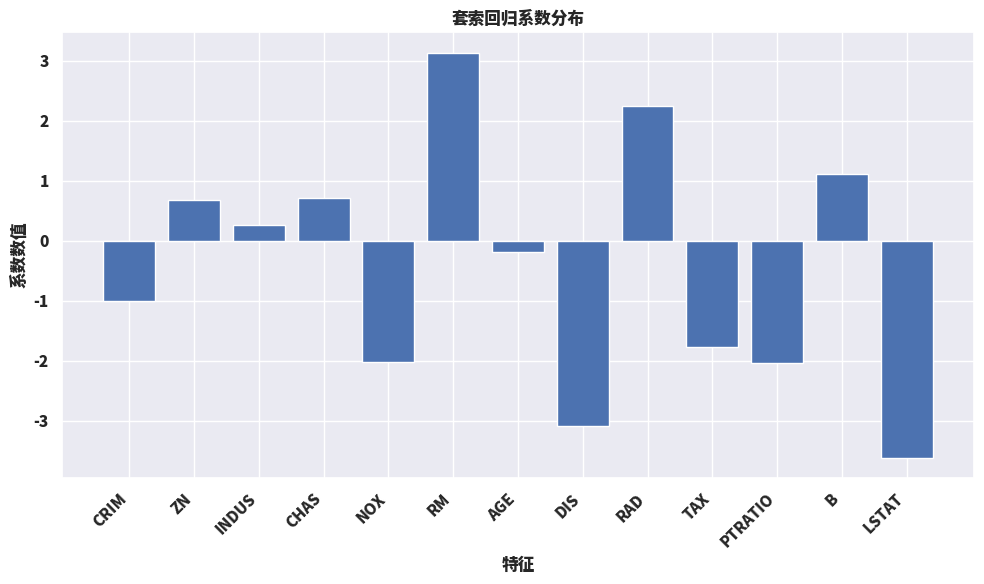

In [7]:
# --- Example 3 ---
# 导入库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 数据集加载（在线）
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = pd.DataFrame(data, columns=feature_names)
y = target

# 划分训练/测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 特征归一化 ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 模型训练与评估 ---
# 1. 普通线性回归
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# 2. 岭回归（自动交叉验证选择最佳alpha）
ridge_cv = RidgeCV(alphas=np.logspace(-4, 4, 100), store_cv_values=True)
ridge_cv.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_cv.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# 3. 套索回归（自动选择最佳alpha）
lasso_cv = LassoCV(alphas=np.logspace(-4, 2, 100), cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_cv.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("--- 各模型均方误差 ---")
print(f"普通线性回归: {mse_lr:.2f}")
print(f"岭回归 (最佳alpha={ridge_cv.alpha_:.2f}): {mse_ridge:.2f}")
print(f"套索回归 (最佳alpha={lasso_cv.alpha_:.2f}): {mse_lasso:.2f}")

# --- 系数分析 ---
coeffs = pd.DataFrame({
    '特征': feature_names,
    'OLS': lr.coef_,
    'Ridge': ridge_cv.coef_,
    'Lasso': lasso_cv.coef_
}).set_index('特征')
print("\n--- 各模型系数 ---")
print(coeffs)

# 套索模型非零系数可视化
plt.figure(figsize=(10, 6))
plt.bar(coeffs.index, coeffs['Lasso'])
plt.title('套索回归系数分布')
plt.xlabel('特征')
plt.ylabel('系数数值')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/var/folders/rj/649h7g4n067cz93vfqs350lm0000gn/T/ipykernel_68086/3519624397.py:14: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


--- 测试集模型评估指标 ---
平均绝对误差 (MAE): 3.19
解释：模型的平均预测误差约为$3189.09。
----------------------------------------
均方误差 (MSE): 24.29
解释：用于模型间比较（越低越好）。
----------------------------------------
均方根误差 (RMSE): 4.93
解释：模型的典型误差约为$4928.60，对大误差敏感。
----------------------------------------
决定系数 (R2): 0.67
解释：模型可解释房价变动的约67%。
----------------------------------------


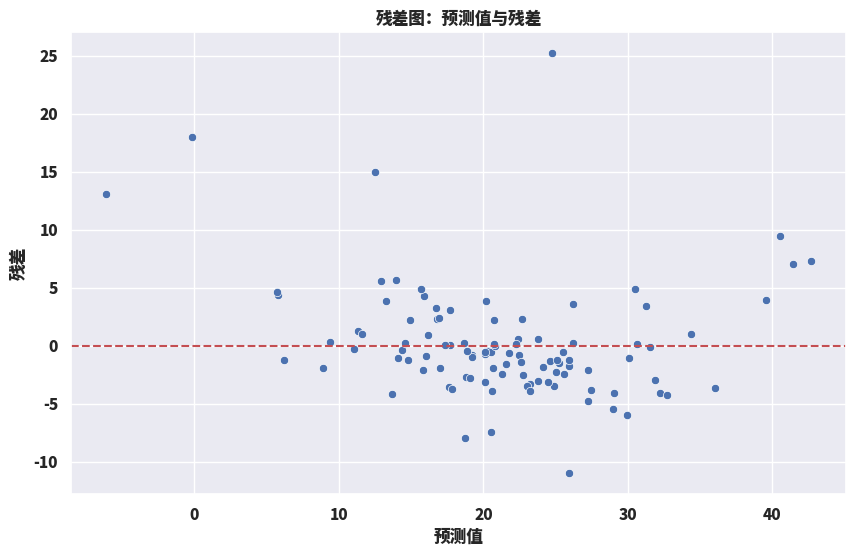


--- 五折交叉验证 ---
各折RMSE: [3.52991509 5.10378498 5.75101191 8.9867887  5.77179405]
平均RMSE: 5.83
RMSE标准差: 1.78


In [8]:
# --- Example 4 ---
# 导入库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 加载Boston Housing数据集
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = pd.DataFrame(data, columns=feature_names)
y = pd.Series(target, name='MEDV')

# --- 1. 训练-测试集划分 ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. 特征归一化与模型训练 ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# --- 3. 测试集预测 ---
y_pred = model.predict(X_test_scaled)

# --- 4. 评估指标计算与解读 ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("--- 测试集模型评估指标 ---")
print(f"平均绝对误差 (MAE): {mae:.2f}")
print(f"解释：模型的平均预测误差约为${mae * 1000:.2f}。")
print("-" * 40)
print(f"均方误差 (MSE): {mse:.2f}")
print("解释：用于模型间比较（越低越好）。")
print("-" * 40)
print(f"均方根误差 (RMSE): {rmse:.2f}")
print(f"解释：模型的典型误差约为${rmse * 1000:.2f}，对大误差敏感。")
print("-" * 40)
print(f"决定系数 (R2): {r2:.2f}")
print(f"解释：模型可解释房价变动的约{r2 * 100:.0f}%。")
print("-" * 40)

# --- 5. 残差可视化 ---
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('残差图：预测值与残差')
plt.xlabel('预测值')
plt.ylabel('残差')
plt.grid(True)
plt.show()

# --- 6. 交叉验证获得更稳健评估 ---
X_scaled = scaler.fit_transform(X)
cv_scores_rmse = np.sqrt(-cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error'))
print("\n--- 五折交叉验证 ---")
print(f"各折RMSE: {cv_scores_rmse}")
print(f"平均RMSE: {cv_scores_rmse.mean():.2f}")
print(f"RMSE标准差: {cv_scores_rmse.std():.2f}")

--- 数据集前几行 ---
                           Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3          

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23458 (\N{CJK UNIFIED IDEOGRAPH-5BA2}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25143 (\N{CJK UNIFIED IDEOGRAPH-6237}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  fig.canvas.print_fig

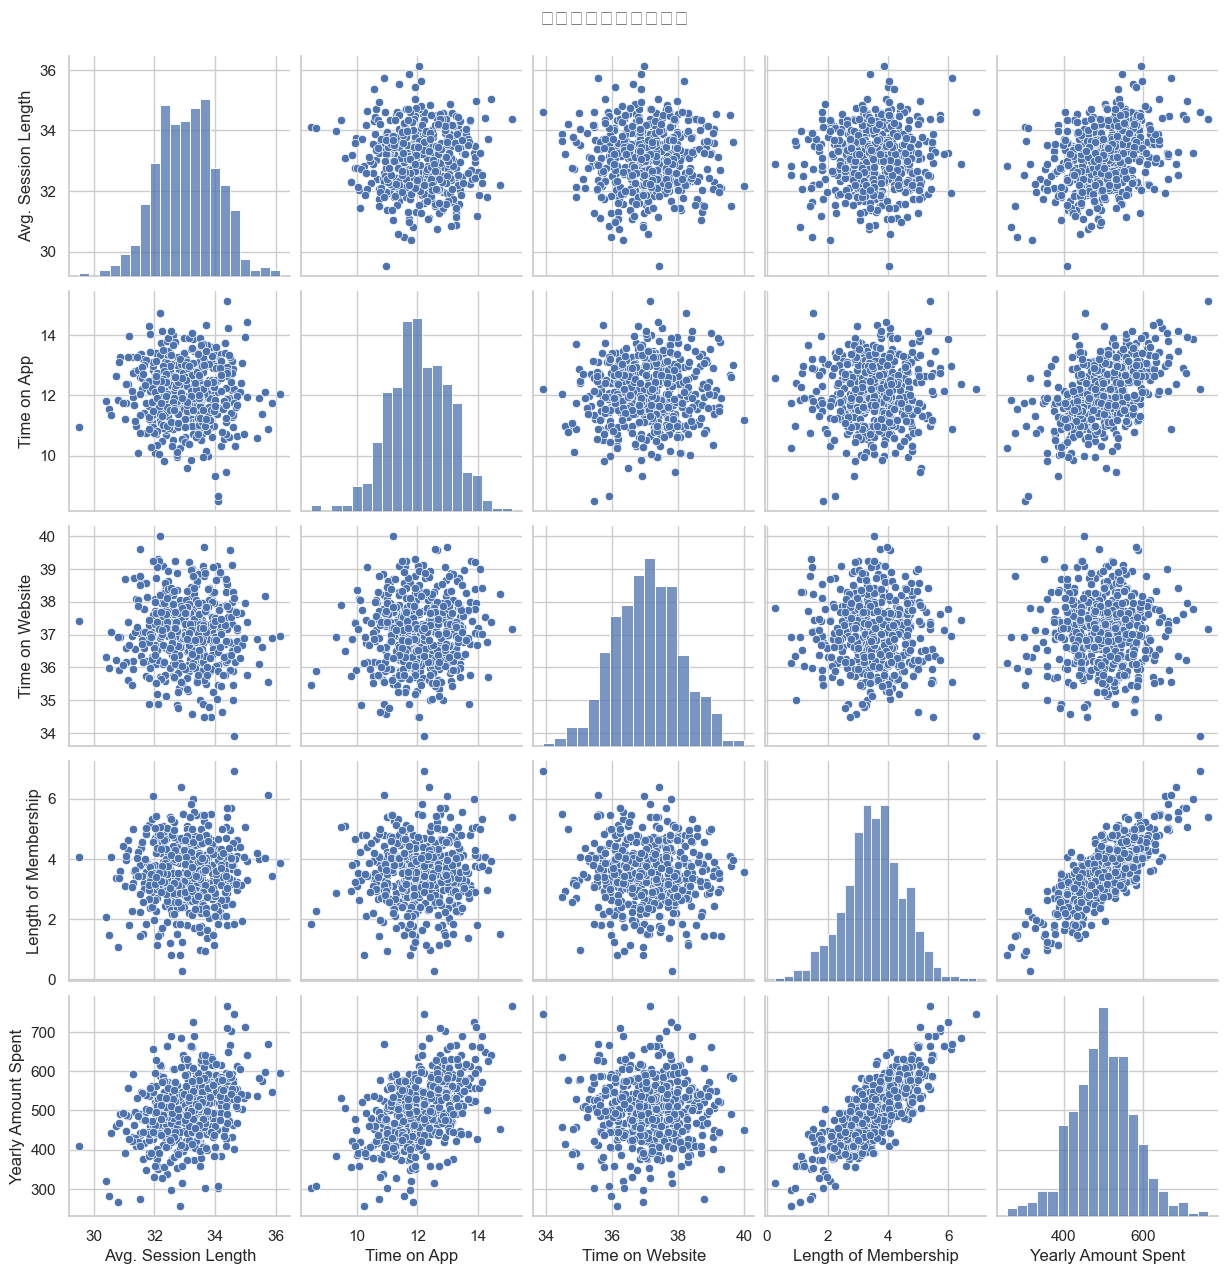

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20250 (\N{CJK UNIFIED IDEOGRAPH-4F1A}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21592 (\N{CJK UNIFIED IDEOGRAPH-5458}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38480 (\N{CJK UNIFIED IDEOGRAPH-9650}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from font(s) Arial.
  fig.canvas.print_fig

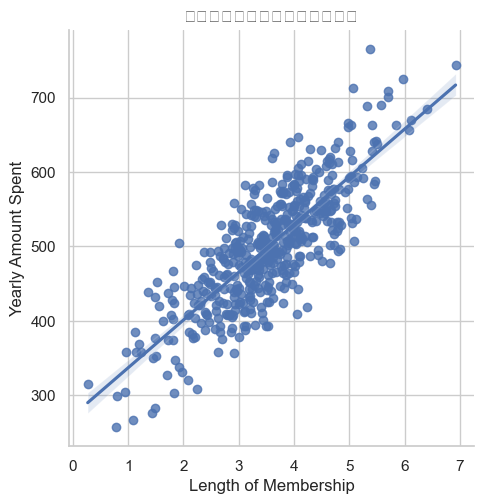

In [10]:
# --- Example 5 ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# 加载本地数据集
customers_df = pd.read_csv("Ecommerce Customers.txt")

print("--- 数据集前几行 ---")
print(customers_df.head())
print("\n--- 数据集信息 ---")
customers_df.info()
print("\n--- 描述性统计 ---")
print(customers_df.describe())

# --- EDA ---
print("\n生成变量对关系的分布图...")
sns.pairplot(customers_df)
plt.suptitle('电商客户数据变量关系', y=1.02)
plt.show()

# 聚焦会员年限与年度消费关系
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers_df)
plt.title('会员年限对年度消费的线性关系')
plt.show()


In [11]:
# --- Example 6 ---
# 定义特征与目标变量
X = customers_df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers_df['Yearly Amount Spent']

from sklearn.model_selection import train_test_split
# 70/30比例划分，确保可复现
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(f"X_train形状: {X_train.shape}")
print(f"X_test形状: {X_test.shape}")

X_train形状: (350, 4)
X_test形状: (150, 4)


In [12]:
# --- Example 7 ---
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
print("线性回归模型已训练完成。")

线性回归模型已训练完成。


In [13]:
# --- Example 8 ---
# 截距
intercept = lm.intercept_
print(f"\n截距: {intercept:.2f}")
# 各特征对应回归系数
coefficients = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print("\n--- 模型系数 ---")
print(coefficients)


截距: -1047.93

--- 模型系数 ---
                      Coefficient
Avg. Session Length     25.981550
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097


中文字体启用： Noto Sans SC

--- 测试集模型评估 ---
平均绝对误差 (MAE): 7.23
均方误差 (MSE): 79.81
均方根误差 (RMSE): 8.93
决定系数 (R2): 0.99


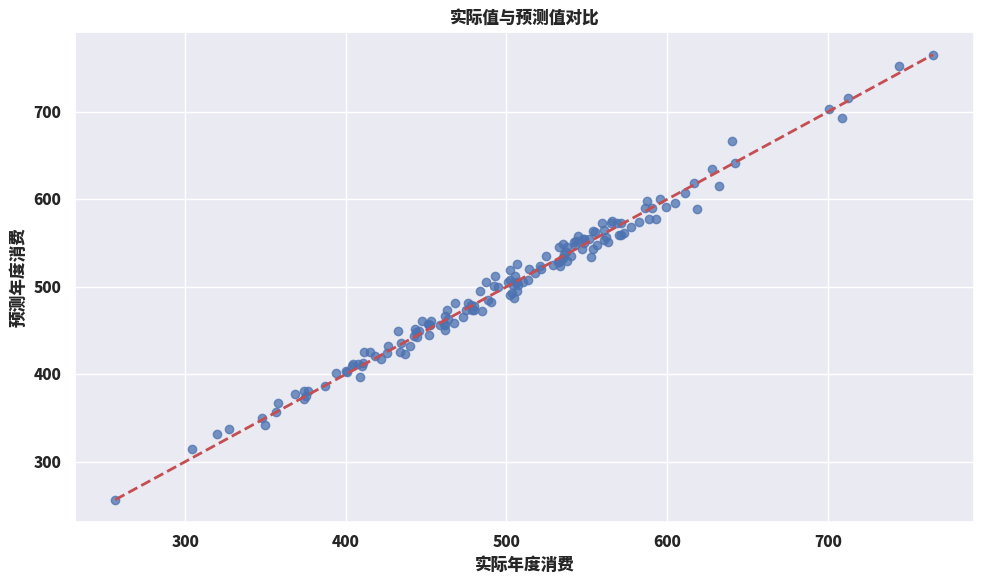

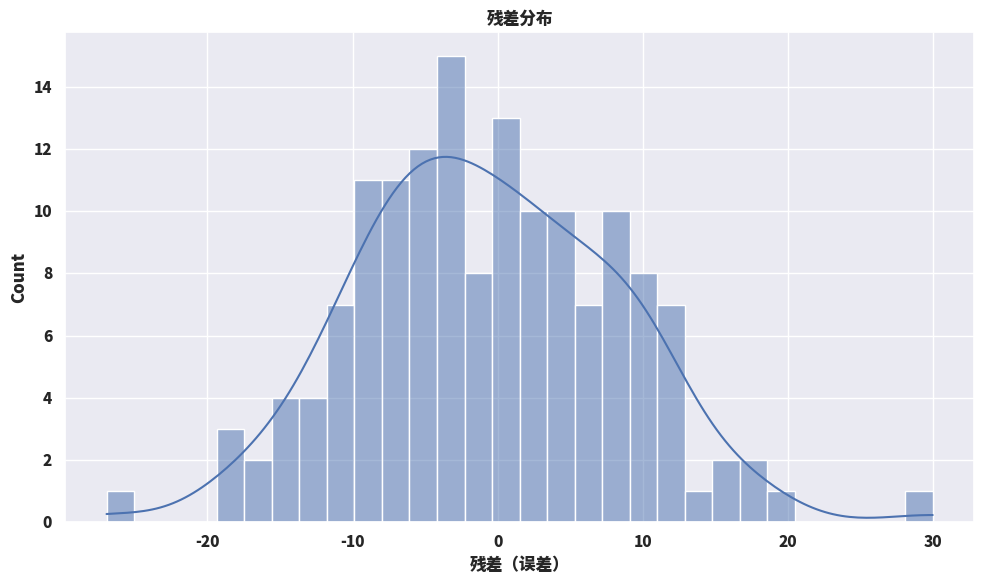

In [16]:
# --- Example 9 (离线中文修复，cell 内就地生效) ---
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm, rcParams
from pathlib import Path

# 1) 就地启用本地中文字体（把 ttf 放在 Notebook 同目录）
FONT_FILE = Path("NotoSansSC-Black.ttf")  # 你手头这款字体
if FONT_FILE.exists():
    fm.fontManager.addfont(str(FONT_FILE.resolve()))
    FONT_NAME = fm.FontProperties(fname=str(FONT_FILE.resolve())).get_name()
    rcParams["font.family"] = [FONT_NAME]
    rcParams["axes.unicode_minus"] = False
    # 防止 seaborn 覆盖字体
    sns.set_theme(font=FONT_NAME, rc={"axes.unicode_minus": False})
    print("中文字体启用：", FONT_NAME)
else:
    print("未找到 NotoSansSC-Black.ttf，中文可能仍显示异常。")

# 2) 下面是你的评估与可视化（确保 lm、X_test、y_test 已在前面定义并训练）
predictions = lm.predict(X_test)

from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, predictions)
print("\n--- 测试集模型评估 ---")
print(f'平均绝对误差 (MAE): {mae:.2f}')
print(f'均方误差 (MSE): {mse:.2f}')
print(f'均方根误差 (RMSE): {rmse:.2f}')
print(f'决定系数 (R2): {r2:.2f}')

# 真实值与预测值散点图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.75)  # 去掉 edgecolors 以免告警
mn, mx = float(np.min(y_test)), float(np.max(y_test))
plt.plot([mn, mx], [mn, mx], 'r--', lw=2)
plt.xlabel('实际年度消费')
plt.ylabel('预测年度消费')
plt.title('实际值与预测值对比')
plt.grid(True)
plt.tight_layout()
plt.show()

# 残差分布
residuals = np.asarray(y_test) - np.asarray(predictions)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('残差分布')
plt.xlabel('残差（误差）')
plt.tight_layout()
plt.show()
